Details of both of datasets are available at https://openproblems.bio/neurips_docs/data/dataset/. Details on multi-modal single-cell data in general can be found here https://openproblems.bio/neurips_docs/data/about_multimodal/.

The data is completely preprocessed and contains the necessary annotations for benchmarking integration methods.

Let's start by loading some necessary libraries:

In [18]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.1 which is incompatible.
episcanpy 0.3.2 requires matplotlib>=3.1.2, but you have matplotlib 3.1.1 which is incompatible.


In [4]:
import os
import gzip

import numpy as np
import pandas as pd
import scanpy as sc 
import episcanpy as esc
import anndata as ann

Mount Google Drive and unzip the dataset.

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab\ Notebooks/single-cell-sequencing
%ls

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/single-cell-sequencing
01_multimodal_autoencoder_cite_data.ipynb
02_multimodal_concat_cite_data.ipynb
eval_embeddings.py
GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad
GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz
GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad.gz
__pycache__/


In [ ]:
import shutil
with gzip.open('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz', 'rb') as f_in:
    with open('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [6]:
cite = sc.read_h5ad('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

In [ ]:
cite.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAATCACCACGGAAGT-1-s4d9,2115,4.367301,0.916475,G2M,123,3283.0,10.0,Lymph prog,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
GCTGGGTGTACGGATG-1-s4d9,1484,4.974369,0.508755,S,124,2695.0,14.0,CD8+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
TCGAAGTGTGACAGGT-1-s4d9,801,8.842443,0.232119,G1,132,3590.0,14.0,T reg,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
GCAGGCTGTTGCATAC-1-s4d9,1630,8.500611,0.549119,G1,133,5432.0,17.0,CD4+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test


In [ ]:
cite.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


We know that the **.X** attribute is supposed to store the counts, but we have two modalities now. Data for both of them will be stored in .X. To subset .X for each individual modality, we can use the .var frame object in the following way:

In [7]:
gex = cite[:, cite.var["feature_types"] == "GEX"]
gex.shape

(90261, 13953)

In [8]:
adt = cite[:, cite.var["feature_types"] == "ADT"]
adt.shape

(90261, 134)

Feature selection. Skip for ADT since there are only 134 features.

In [9]:
sc.pp.highly_variable_genes(gex, n_top_genes=2500, flavor="seurat_v3")

In [10]:
# PCA
sc.pp.pca(gex, n_comps=20)
sc.pp.pca(adt, n_comps=20)

In [11]:
embedding_concat = np.concatenate(
    (
        gex.obsm["X_pca"][:, 0:20],
        adt.obsm["X_pca"][:, 0:20]
    ),
    axis = 1
)
embedding_concat.shape

(90261, 40)

In [12]:
from eval_embeddings import EvalEmbeddings

In [13]:
eval_obj = EvalEmbeddings(adata=adt) # Initialize the class
eval_obj.evaluate(embedding_concat) # Evaluate

(0.5667885753826185,
    celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
 0      0.262607      0.607126              0.652956           0.569381   
 
    batch_ari  batch_ami  batch_homogeneity  batch_complete  
 0   0.785723   0.591193            0.49867        0.654193  )

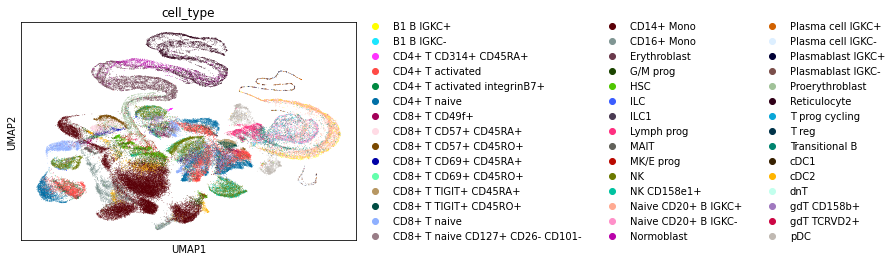

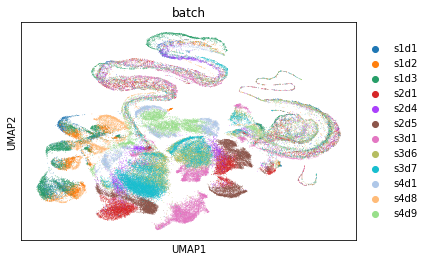

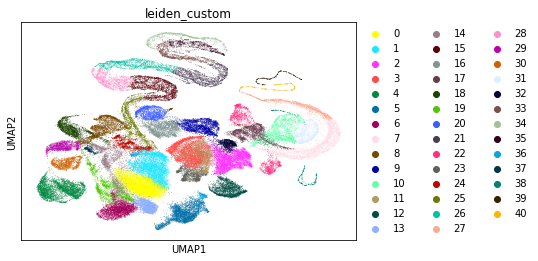

In [19]:
eval_obj.plot() # Plot the results 